<a href="https://colab.research.google.com/github/quespring/fruit_recognition_machine_learning/blob/main/Fruit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The source code:
#https://analyticsindiamag.com/fruit-recognition-using-the-convolutional-neural-network/

#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dir_path = "/content/gdrive/MyDrive/Colab Notebooks/Assignment04"

In [ ]:
#Importing Library
import numpy as np
import pandas as pd
import cv2
import os 
from PIL import Image

In [ ]:
#Checking the directory
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_49.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_48.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_65.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/apple_49.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/apple_70.xml
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_69.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_56.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/apple_3.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_14.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/apple_23.xml
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_64.xml
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_61.xml
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train/banana_34.jpg
/content/gdrive/MyDrive/Colab Notebooks/Assignment04/tra

In [ ]:
images  =  []       
labels  =  [] 
train_path  =  '/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train'
for filename in os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Assignment04/train'):
    if filename.split('.')[1] == 'jpg':
        img  =  cv2.imread(os.path.join(train_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((50,50))
        labels.append(filename.split('_')[0])
        images.append(np.array(img_arr))

In [ ]:
#Image Labels
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = pd.DataFrame(labels)
labels

,0
0,banana
1,banana
2,banana
3,apple
4,banana
...,...
235,orange
236,orange
237,orange
238,orange


In [ ]:
labels = pd.DataFrame(labels)
le = le.fit_transform(labels[0])
le

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3])

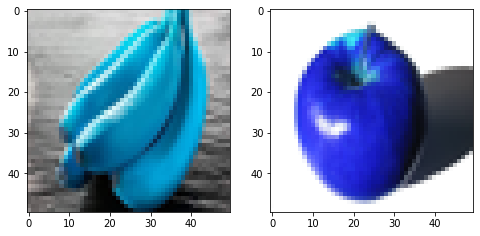

In [ ]:
#Visualizing image
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (8,8))
ax = figure.add_subplot(121)
ax.imshow(images[26])
bx = figure.add_subplot(122)
bx.imshow(images[42])
plt.show()

In [ ]:
#In the next step, we will preprocess the image data

In [ ]:
#Saving the image array and corresponding labels
images = np.array(images)
np.save("image",images)
np.save("labels",labels)

#Loading the images and labels that we have saved above
image = np.load("image.npy",allow_pickle = True)
labels = np.load("labels.npy",allow_pickle = True)

img_shape  = np.arange(image.shape[0])
np.random.shuffle(img_shape)
image = image[img_shape]
labels = labels[img_shape]

In [ ]:
#Now, we will define the train and the test data set.
num_classes = len(np.unique(labels))
len_data = len(image)

x_train, x_test = image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]
y_train,y_test = le[(int)(0.1*len_data):],le[:(int)(0.1*len_data)]

import keras
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
#After defining the training and test sets, we will define and train the convolutional neural 
#network model. As a kernel regularization, we will use the L2 regularization method.

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

l2_reg = 0.001
opt = Adam(lr = 0.001)

#Defining the CNN Model
cnn_model  =  Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (50,50, 3), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(16, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

#CNN Model Summary
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 128)        

In [ ]:
#Compiling the model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])


In [ ]:
#Training the CNN Model
history = cnn_model.fit(x_train,y_train,batch_size = 128,epochs = 110,verbose = 1,validation_split = 0.33)

Epoch 1/110
2/2 [==============================] - 1s 195ms/step - loss: 40.5829 - accuracy: 0.0608 - val_loss: 21.6833 - val_accuracy: 0.0000e+00
Epoch 2/110
2/2 [==============================] - 0s 39ms/step - loss: 11.7306 - accuracy: 0.3895 - val_loss: 14.9992 - val_accuracy: 0.0000e+00
Epoch 3/110
2/2 [==============================] - 0s 36ms/step - loss: 10.5696 - accuracy: 0.4407 - val_loss: 5.2849 - val_accuracy: 0.7083
Epoch 4/110
2/2 [==============================] - 0s 41ms/step - loss: 6.7835 - accuracy: 0.1817 - val_loss: 10.5819 - val_accuracy: 0.0000e+00
Epoch 5/110
2/2 [==============================] - 0s 37ms/step - loss: 7.3282 - accuracy: 0.3941 - val_loss: 8.5796 - val_accuracy: 0.0000e+00
Epoch 6/110
2/2 [==============================] - 0s 49ms/step - loss: 2.6971 - accuracy: 0.4008 - val_loss: 14.3743 - val_accuracy: 0.0000e+00
Epoch 7/110
2/2 [==============================] - 0s 40ms/step - loss: 4.8087 - accuracy: 0.4389 - val_loss: 14.1222 - val_accuracy

In [ ]:
#Check the performance
scores  =  cnn_model.evaluate(x_test, y_test, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1/1 [==============================] - 0s 16ms/step - loss: 3.9892 - accuracy: 0.4583
Test loss: 3.989219903945923
Test accuracy: 0.4583333432674408


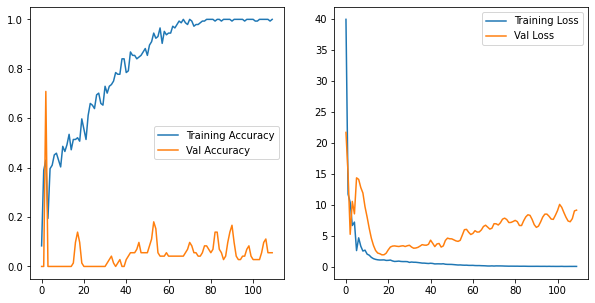

In [ ]:
#Visualize the performance
figure = plt.figure(figsize = (10,5))
ax = figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx = figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

0


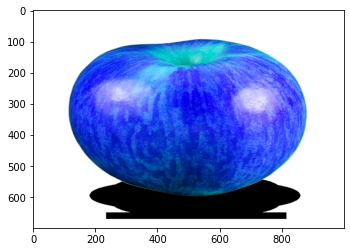

In [ ]:
#Test
test_path  =  '/content/gdrive/MyDrive/Colab Notebooks/Assignment04/test'
t_labels = []
t_images = []
for filename in os.listdir('/content/gdrive/MyDrive/Colab Notebooks/Assignment04/test'):
    if filename.split('.')[1]  ==  'jpg':
        img  =  cv2.imread(os.path.join(test_path,filename))
        arr = Image.fromarray(img,'RGB')
        img_arr = arr.resize((1000,700))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(img_arr))

test_images = np.array(t_images)
np.save("test_image",test_images) 
test_image = np.load("image.npy",allow_pickle = True)

#pred = np.argmax(cnn_model.predict(test_image),axis = 1)
#prediction = le.inverse_transform(pred)

test_image = np.expand_dims(test_image[25],axis = 0)
pred_test = np.argmax(cnn_model.predict(test_image),axis = 1)
#prediction_test = le.inverse_transform(pred_test)

print(pred_test[0])
plt.imshow(test_images[11])